In [2]:
import pandas as pd
import torch
from torch import nn
from torch.utils.data import Dataset, DataLoader
import re
from sklearn.model_selection import train_test_split
from tqdm import tqdm
from transformers import BertTokenizerFast
import matplotlib.pyplot as plt


/home/al_dovgan/yandex_neural/projects/sprint2_hw/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# load & preprocess

In [3]:
with open('./data/raw_dataset.csv', 'r', encoding='utf-8') as f:
    data = pd.DataFrame([line.rstrip('\n') for line in f], columns=['text'])

In [4]:
def clean_string(text):
    # приведение к нижнему регистру
    text = text.lower()
    # удаление всего, кроме латинских букв, цифр и пробелов
    text = re.sub(r'[^a-z0-9\s]', '', text)
    # удаление дублирующихся пробелов, удаление пробелов по краям
    text = re.sub(r'\s+', ' ', text).strip()
    
    return text
    


In [5]:
data['text'] = data['text'].apply(clean_string)
data = data.drop_duplicates('text')

tokenizer = BertTokenizerFast.from_pretrained("bert-base-uncased")
tok_text = []
for text in tqdm(data['text'], desc="Preprocessing dataset", colour='green'):
    # Токенизируем текст
    token_ids = tokenizer.encode(
        text, 
        add_special_tokens=True,  # Добавляем [CLS] и [SEP]
        max_length=512, 
        truncation=True
    )
    tok_text.append(token_ids)

data['tok_text'] = tok_text

Preprocessing dataset: 100%|██████████| 1568252/1568252 [01:20<00:00, 19460.32it/s]


# eda

In [6]:
# посчитаем характеристики текстов, чтобы определить оптимальную длину входной sequence 
data['symbols_n'] = data['text'].str.len()
data['words_n'] = data['text'].apply(lambda x:len(x.split(' ')))
data['tokens_n'] = data['tok_text'].apply(len)

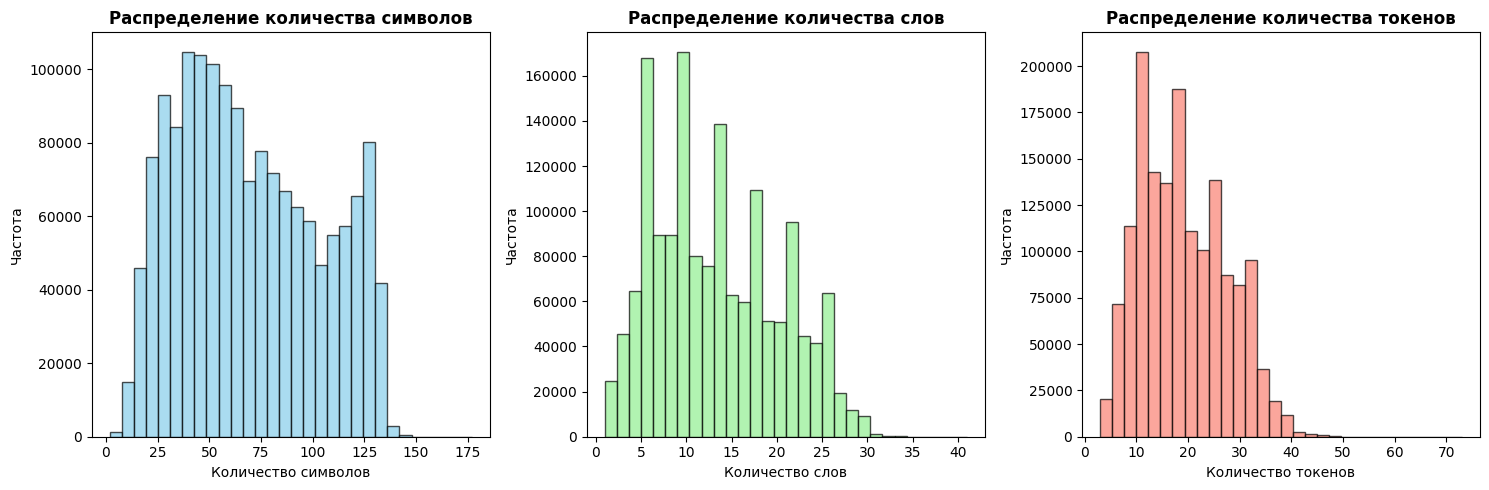

In [7]:

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Гистограмма для количества символов
axes[0].hist(data['symbols_n'], bins=30, alpha=0.7, color='skyblue', edgecolor='black')
axes[0].set_title('Распределение количества символов', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Количество символов')
axes[0].set_ylabel('Частота')

# Гистограмма для количества слов
axes[1].hist(data['words_n'], bins=30, alpha=0.7, color='lightgreen', edgecolor='black')
axes[1].set_title('Распределение количества слов', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Количество слов')
axes[1].set_ylabel('Частота')

# Гистограмма для количества токенов
axes[2].hist(data['tokens_n'], bins=30, alpha=0.7, color='salmon', edgecolor='black')
axes[2].set_title('Распределение количества токенов', fontsize=12, fontweight='bold')
axes[2].set_xlabel('Количество токенов')
axes[2].set_ylabel('Частота')


# Настраиваем layout и отображаем
plt.tight_layout()
plt.show()